# Librería

In [41]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [42]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [43]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [45]:
titanic.describe(include="all").round(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [46]:
titanic["Ticket"].nunique()

681

# Mini EDA

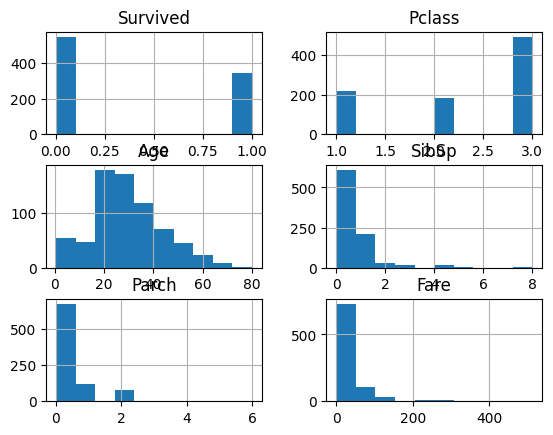

In [47]:
titanic.hist();

# Tratamiento de missing y valores atípicos

In [48]:
titanic.drop(["Cabin", "Name", "Ticket"], inplace=True, axis=1)
titanic.dropna(inplace=True)

In [49]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [50]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

mmax = MinMaxScaler()
titanic["Fare"] = mmax.fit_transform(titanic[["Fare"]])
# titanic["Fare"] = np.log(titanic["Fare"] + 1) #para evitar el error por datos = 0

le = LabelEncoder()
titanic["Embarked"] = le.fit_transform(titanic[["Embarked"]])

c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
titanic.describe().round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,712.00,712.00,712.00,712.00,712.00,712.00,712.00
mean,0.40,2.24,29.64,0.51,0.43,0.07,1.60
std,0.49,0.84,14.49,0.93,0.85,0.10,0.78
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,1.00,20.00,0.00,0.00,0.02,2.00
50%,0.00,2.00,28.00,0.00,0.00,0.03,2.00
75%,1.00,3.00,38.00,1.00,1.00,0.06,2.00
max,1.00,3.00,80.00,5.00,6.00,1.00,2.00


# Feature Engineer

In [52]:
mapeo = {"male":0, "female":1}
titanic["Sex"].replace(mapeo, inplace=True)

In [53]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,0.014151,2
2,1,1,1,38.0,1,0,0.139136,0
3,1,3,1,26.0,0,0,0.015469,2
4,1,1,1,35.0,1,0,0.103644,2
5,0,3,0,35.0,0,0,0.015713,2


# División de Datos

In [54]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado + Dummies

In [58]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.240773,0.365554,29.582021,0.513181,0.405975,0.062564,1.623902
std,0.832879,0.482009,14.194751,0.934615,0.842552,0.090999,0.761664
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,0.015713,2.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,0.028221,2.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,0.060508,2.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,1.000000,2.000000


# Cross-Validation + Base-Lines

In [59]:
modelos = {
    "Logistic Regression": LogisticRegression(),
    "SVC_linear": SVC(kernel='linear'),
    "SVC_poly": SVC(kernel='poly',degree=4),
    "SVC_rbf": SVC(),
}

# Define las métricas a usar
metricas = ["accuracy"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

,0
Logistic Regression_accuracy,0.801459
SVC_linear_accuracy,0.787378
SVC_poly_accuracy,0.634467
SVC_rbf_accuracy,0.636175


# Entrenar

# Predicción

# Validación del modelo